In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime
import math 
import matplotlib.pyplot as plt
import datetime 

In [2]:
df = pd.read_csv("mpc_demo.csv")
df.head()

,time,.header.seq,.header.stamp.secs,.header.stamp.nsecs,.header.frame_id,.child_frame_id,.pose.pose.position.x,.pose.pose.position.y,.pose.pose.position.z,.pose.pose.orientation.x,...,.pose.pose.orientation.z,.pose.pose.orientation.w,.pose.covariance,.twist.twist.linear.x,.twist.twist.linear.y,.twist.twist.linear.z,.twist.twist.angular.x,.twist.twist.angular.y,.twist.twist.angular.z,.twist.covariance
0,2024/03/22/15:35:32.900941,653,1711107332,872300386,dlo_odom,base_link,-0.000982,0.000606,-0.000008,-0.007867,...,0.000078,0.999961,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2024/03/22/15:35:33.012874,654,1711107332,972491503,dlo_odom,base_link,-0.001274,0.000887,0.000134,-0.007806,...,0.000052,0.999962,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2024/03/22/15:35:33.096202,655,1711107333,72695971,dlo_odom,base_link,-0.001460,0.002097,0.000426,-0.007807,...,0.000045,0.999962,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,2024/03/22/15:35:33.309802,656,1711107333,172885895,dlo_odom,base_link,-0.003073,0.000865,0.000760,-0.007860,...,0.000095,0.999961,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,2024/03/22/15:35:33.596313,657,1711107333,273082733,dlo_odom,base_link,-0.001358,0.000334,-0.000101,-0.007772,...,0.000109,0.999962,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [3]:
df.columns.values

array(['time', '.header.seq', '.header.stamp.secs', '.header.stamp.nsecs',
       '.header.frame_id', '.child_frame_id', '.pose.pose.position.x',
       '.pose.pose.position.y', '.pose.pose.position.z',
       '.pose.pose.orientation.x', '.pose.pose.orientation.y',
       '.pose.pose.orientation.z', '.pose.pose.orientation.w',
       '.pose.covariance', '.twist.twist.linear.x',
       '.twist.twist.linear.y', '.twist.twist.linear.z',
       '.twist.twist.angular.x', '.twist.twist.angular.y',
       '.twist.twist.angular.z', '.twist.covariance'], dtype=object)

In [4]:
df.rename(columns = {'.pose.pose.position.x':'PosX', '.pose.pose.position.y':'PosY' ,'.pose.pose.position.z':'PosZ' ,\
     '.pose.pose.orientation.x':'OrX','.pose.pose.orientation.y':'OrY','.pose.pose.orientation.z':'OrZ','.pose.pose.orientation.w':'OrW'}, inplace = True)
df.head()

,time,.header.seq,.header.stamp.secs,.header.stamp.nsecs,.header.frame_id,.child_frame_id,PosX,PosY,PosZ,OrX,...,OrZ,OrW,.pose.covariance,.twist.twist.linear.x,.twist.twist.linear.y,.twist.twist.linear.z,.twist.twist.angular.x,.twist.twist.angular.y,.twist.twist.angular.z,.twist.covariance
0,2024/03/22/15:35:32.900941,653,1711107332,872300386,dlo_odom,base_link,-0.000982,0.000606,-0.000008,-0.007867,...,0.000078,0.999961,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2024/03/22/15:35:33.012874,654,1711107332,972491503,dlo_odom,base_link,-0.001274,0.000887,0.000134,-0.007806,...,0.000052,0.999962,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2024/03/22/15:35:33.096202,655,1711107333,72695971,dlo_odom,base_link,-0.001460,0.002097,0.000426,-0.007807,...,0.000045,0.999962,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,2024/03/22/15:35:33.309802,656,1711107333,172885895,dlo_odom,base_link,-0.003073,0.000865,0.000760,-0.007860,...,0.000095,0.999961,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,2024/03/22/15:35:33.596313,657,1711107333,273082733,dlo_odom,base_link,-0.001358,0.000334,-0.000101,-0.007772,...,0.000109,0.999962,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [5]:
df.columns.values

array(['time', '.header.seq', '.header.stamp.secs', '.header.stamp.nsecs',
       '.header.frame_id', '.child_frame_id', 'PosX', 'PosY', 'PosZ',
       'OrX', 'OrY', 'OrZ', 'OrW', '.pose.covariance',
       '.twist.twist.linear.x', '.twist.twist.linear.y',
       '.twist.twist.linear.z', '.twist.twist.angular.x',
       '.twist.twist.angular.y', '.twist.twist.angular.z',
       '.twist.covariance'], dtype=object)

In [6]:
df.drop(['.header.seq', '.header.stamp.secs', '.header.stamp.nsecs','.header.frame_id' ,\
    '.child_frame_id', '.pose.covariance', '.twist.twist.linear.x',\
       '.twist.twist.linear.y', '.twist.twist.linear.z',\
       '.twist.twist.angular.x', '.twist.twist.angular.y',\
       '.twist.twist.angular.z', '.twist.covariance','OrX', 'OrY', 'OrZ', 'OrW','PosZ'], inplace=True, axis=1)
# df.drop(['PosZ', '.pose.pose.orientation.x', '.pose.pose.orientation.y', '.pose.pose.orientation.z',\
#        '.pose.pose.orientation.w'], inplace=True, axis=1)
df.head()

,time,PosX,PosY
0,2024/03/22/15:35:32.900941,-0.000982,0.000606
1,2024/03/22/15:35:33.012874,-0.001274,0.000887
2,2024/03/22/15:35:33.096202,-0.001460,0.002097
3,2024/03/22/15:35:33.309802,-0.003073,0.000865
4,2024/03/22/15:35:33.596313,-0.001358,0.000334


In [7]:
from datetime import datetime
df['time']= df['time'].apply(lambda x: datetime.strptime(x.strip(), '%Y/%m/%d/%H:%M:%S.%f'))
df['time']

0     2024-03-22 15:35:32.900941
1     2024-03-22 15:35:33.012874
2     2024-03-22 15:35:33.096202
3     2024-03-22 15:35:33.309802
4     2024-03-22 15:35:33.596313
                 ...            
629   2024-03-22 15:36:35.910621
630   2024-03-22 15:36:36.015177
631   2024-03-22 15:36:36.118317
632   2024-03-22 15:36:36.217343
633   2024-03-22 15:36:36.314192
Name: time, Length: 634, dtype: datetime64[ns]

In [8]:
df.head(5)

,time,PosX,PosY
0,2024-03-22 15:35:32.900941,-0.000982,0.000606
1,2024-03-22 15:35:33.012874,-0.001274,0.000887
2,2024-03-22 15:35:33.096202,-0.001460,0.002097
3,2024-03-22 15:35:33.309802,-0.003073,0.000865
4,2024-03-22 15:35:33.596313,-0.001358,0.000334


## Calculate the Velocity 

In [9]:
lastPx = df.PosX[0] 
lastPy = df.PosY[0]
lastT = df.time[0].timestamp() - 0.001
vMag = []
timeStamp = []
t = []
for idx , (currentT , currentPx, currentPy) in enumerate (zip(df.time ,df.PosX, df.PosY)):
    #if idx !=0:  
    currentT = currentT.timestamp() #- df.time[0].timestamp()
    # else:
        # currentT = 0 
    timeStamp.append((currentT)) # in mins
    t.append(currentT-timeStamp[0])
    dt = currentT-lastT
    dt = max(dt, 0.03)
    # print(dt) 
    dx = currentPx - lastPx
    # print(dx)
    dy = currentPy - lastPy
    # print(dy)
    # try:
    currentVx = float(dx)/float(dt)
    # except:
        # print("division by Zero , 2lak ma henta ")
    currentVy = float(dy/dt) 
    vv =math.sqrt(currentVx**2 + currentVy**2)
    if vv > 1200:
        print(dx, dy, dt, currentVx, currentVy)
    # print(vv)
    vMag.append(vv)
    lastT , lastPx  , lastPy  = currentT , currentPx  , currentPy 

df['Vmag'] = vMag
df['t'] = t
df.describe()

,time,PosX,PosY,Vmag,t
count,634,634.000000,634.000000,634.000000,634.000000
mean,2024-03-22 15:36:04.622619136,7.331601,6.262150,0.476790,31.721678
min,2024-03-22 15:35:32.900941,-0.003073,-0.000739,0.000000,0.000000
25%,2024-03-22 15:35:48.757896192,4.455913,2.038082,0.384865,15.856955
50%,2024-03-22 15:36:04.620523008,7.576656,3.866167,0.472969,31.719582
75%,2024-03-22 15:36:20.499788288,10.366050,10.538604,0.578741,47.598847
max,2024-03-22 15:36:36.314192,12.986754,14.700255,0.939046,63.413251
std,NaN,3.791635,5.040107,0.159743,18.346490


## Plot the Velocity Profile 

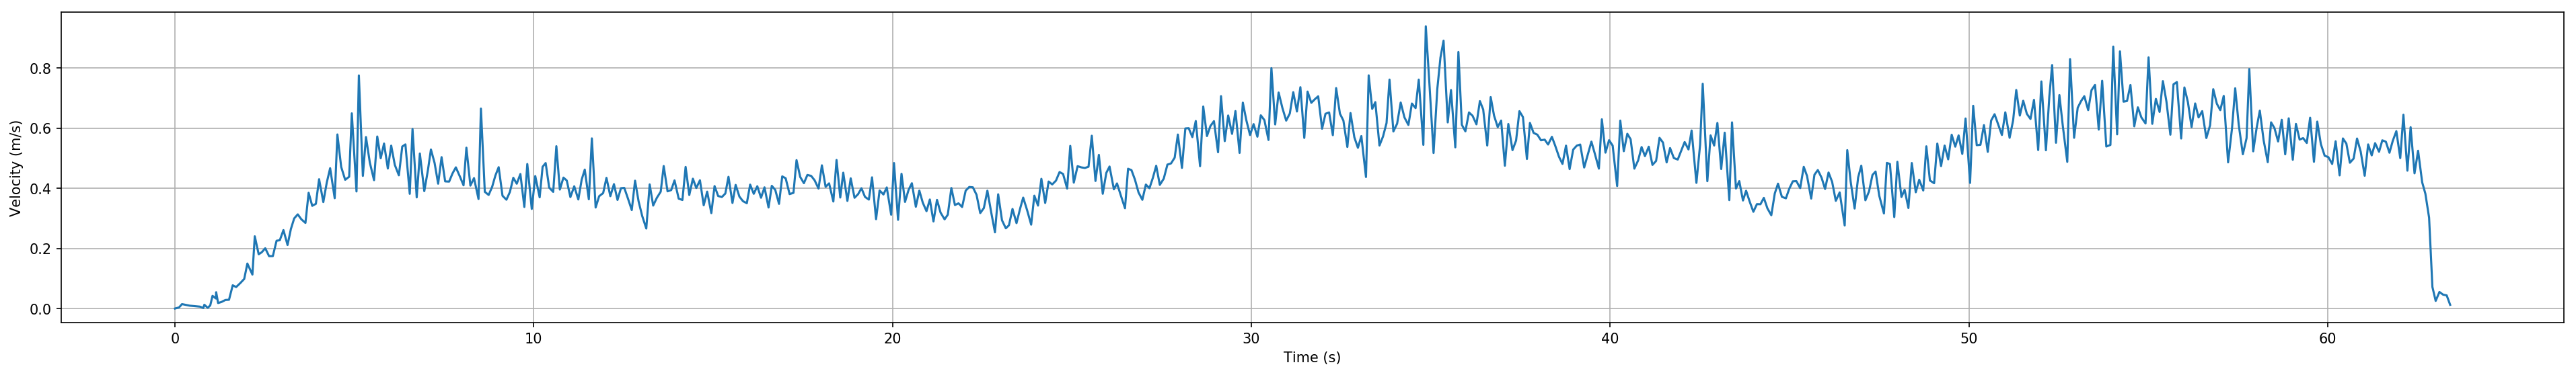

In [10]:
plt.figure(dpi=150, figsize=(32,4))
plt.grid()
# plt.xlim(0,51)
# plt.ylim(0,0.9)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
# plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
plt.plot(t, vMag)

## Filter the Velocity from T = 5.0 Sec and T =85.0 Sec 

In [11]:
df=df.loc[(df['t'] >= 3)]
df.reset_index(drop=True, inplace=True)
# df.head()
# df_new = df.iloc[df.t >= 0.0 and df.t <=51.0] 

## Plot Filtered Velocity Profile 

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

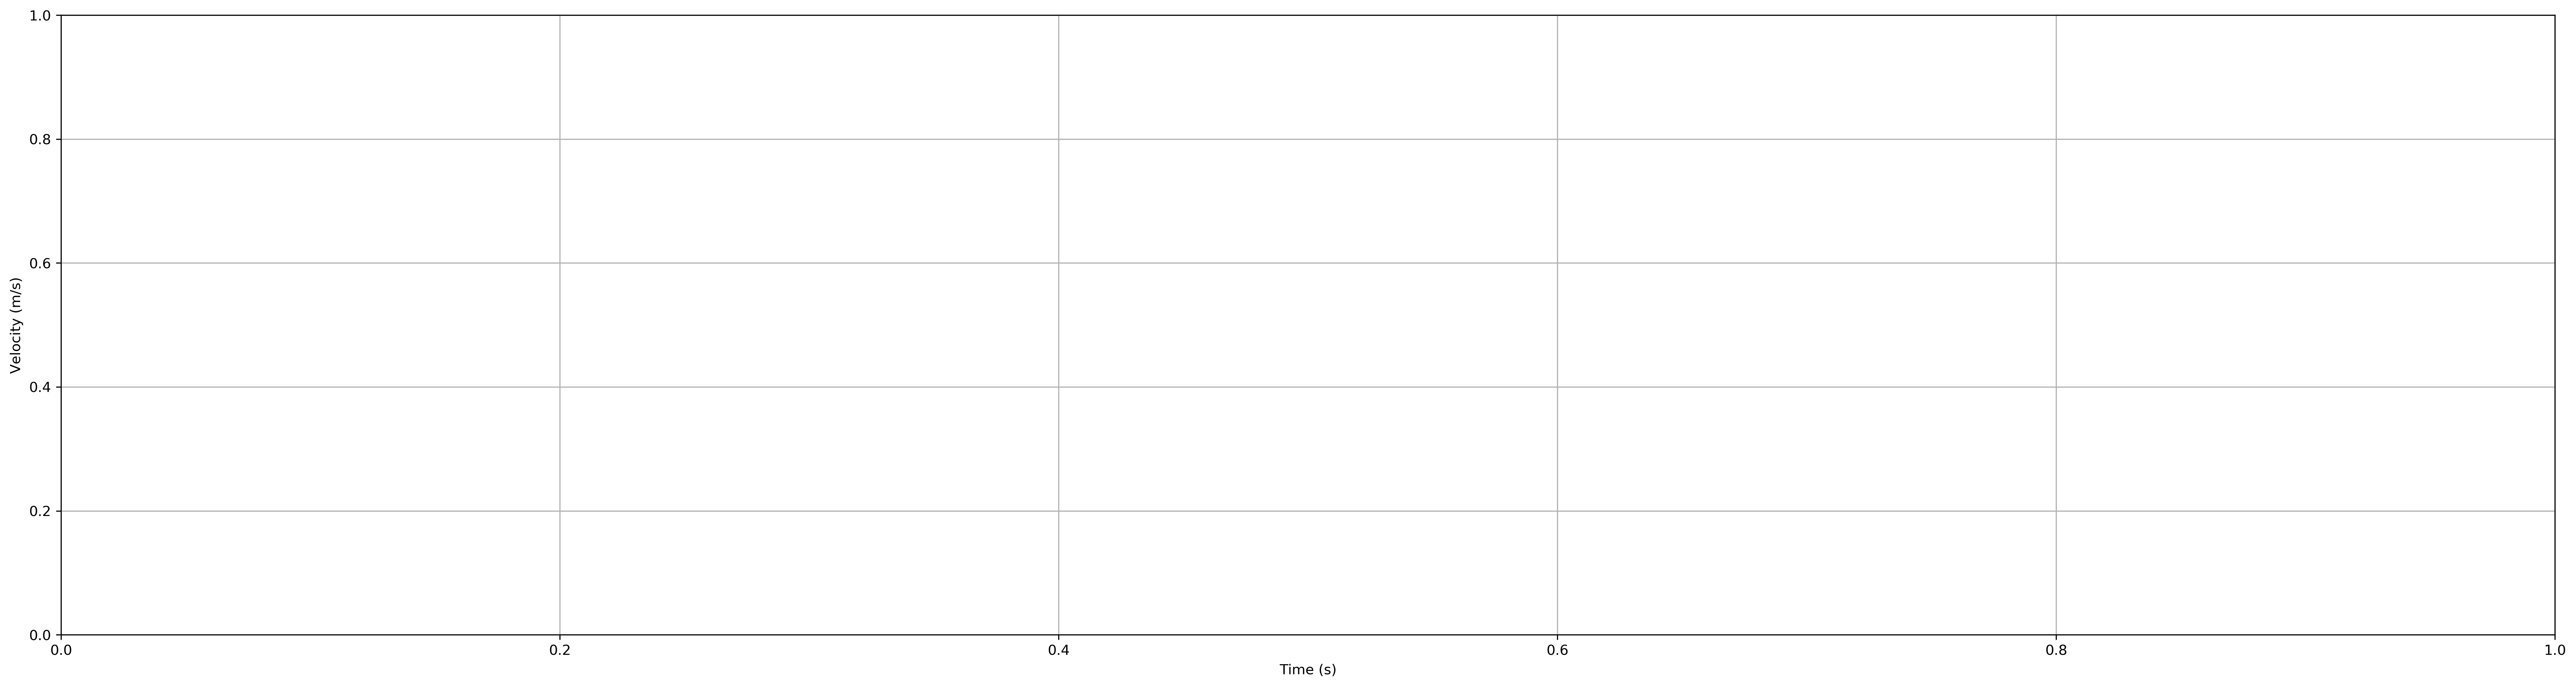

In [12]:
plt.figure(dpi=300, figsize=(32,8))
plt.grid()
# plt.xlim(5,84)
# plt.ylim(0,1.5)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
# plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
plt.plot(df.t, df.Vmag)

## Plot the Waypoints 

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

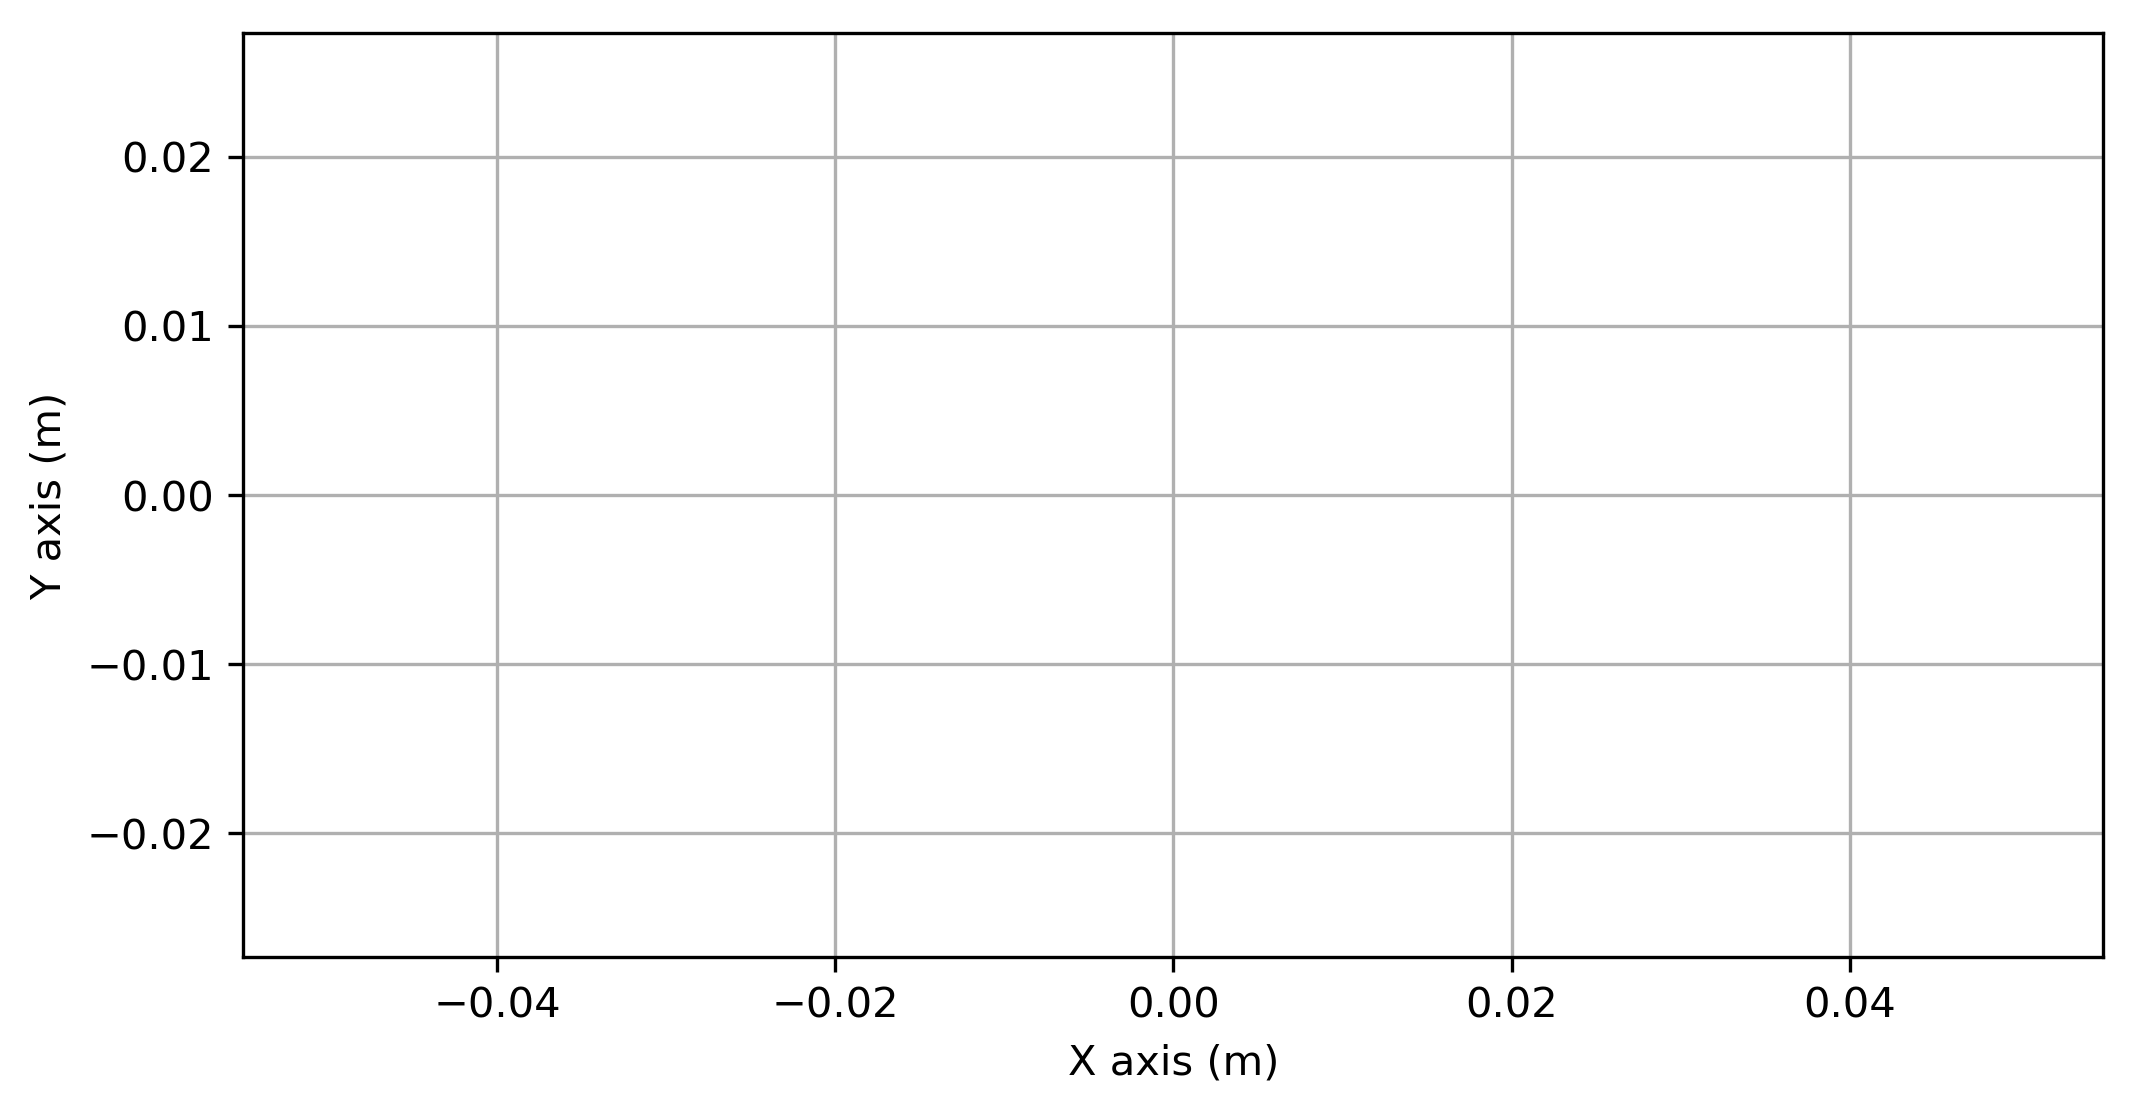

In [13]:
plt.figure(dpi=300, figsize=(8,4))
plt.grid()
plt.xlabel('X axis (m)')
plt.ylabel('Y axis (m)')
plt.axis('equal')
plt.plot(df.PosX , df.PosY)


In [14]:
carla_df = pd.DataFrame([df.PosX ,df.PosY , df.Vmag, df.t]).transpose()
carla_df.columns=['X','Y','V','Tway']
carla_df.Y = carla_df.Y
carla_df.Tway = carla_df.Tway - carla_df.Tway[0] 
# carla_df.X = carla_df.X - carla_df.X[0] 
# carla_df.Y = carla_df.Y - carla_df.Y[0] 
# carla_df.V = carla_df.V - carla_df.V[0] 
print(carla_df.columns.values)
print(carla_df.shape)
carla_df.head() 

['X' 'Y' 'V' 'Tway']
(604, 4)


,X,Y,V,Tway
0,0.245929,0.029811,0.260967,0.000000
1,0.270153,0.030553,0.211334,0.114676
2,0.294698,0.032570,0.264619,0.207748
3,0.322050,0.035516,0.299771,0.299518
4,0.353037,0.039008,0.313272,0.399057


#### Build waypoints

In [15]:
# # sample_df = carla_df_avgV[start:finish]
# sample_df = carla_df[1:41]
# print(sample_df)
# print(sample_df.shape)
def avg_calc(sample):
  return sample.mean()
  
# x,y,v,t = avg_calc(sample= sample_df)
# print(x,y,v,t)

start = 0
increment = 15
finish = start + increment 
t_wp = []
x = []
y = []
v = []

x.append(carla_df.X[0])
y.append(carla_df.Y[0])
v.append(carla_df.V[0])
t_wp.append(0.0)
t_wp_0 = carla_df.Tway[0]

# print('    X\t\t      Y\t\t     V\t\t     T')
for i in range((carla_df.shape[0] - start)//increment):
    sample_df = carla_df[start:finish]
    xVal, yVal, vVal, tVal = avg_calc(sample= sample_df)
    x.append(xVal)
    y.append(yVal)
    v.append(vVal)
    t_wp.append(tVal-t_wp_0)
    
    # print(round(xVal,6),'\t',round(yVal,6),'\t',round(vVal,6),'\t',round(tVal-t_wp_0,6))

    start = finish
    finish += increment

# print((t_wp))
waypoints_df = pd.DataFrame()
waypoints_df['X'] = x
waypoints_df['Y'] = y
waypoints_df['V'] = v
waypoints_df['T'] = t_wp
# waypoints_df['V_avg'] = waypoints_df['V'].rolling(15).mean()
# waypoints_df.columns=['T','X','Y','V']
waypoints_df.shape

(41, 4)

In [41]:
# from math import nan

# for i in range(0,14):
#     waypoints_df['V_avg'][i] = waypoints_df['V_avg'][14]/13 * i
# waypoints_df['V_avg']

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

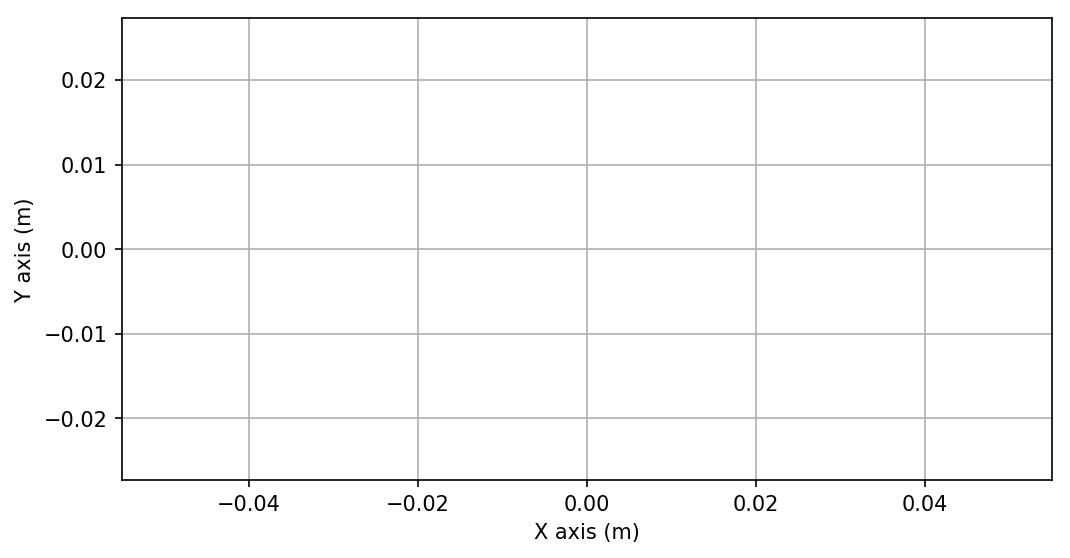

In [16]:
plt.figure(dpi=150, figsize=(8,4))
plt.grid()
plt.xlabel('X axis (m)')
plt.ylabel('Y axis (m)')
plt.axis('equal')
plt.plot(waypoints_df.X , waypoints_df.Y)

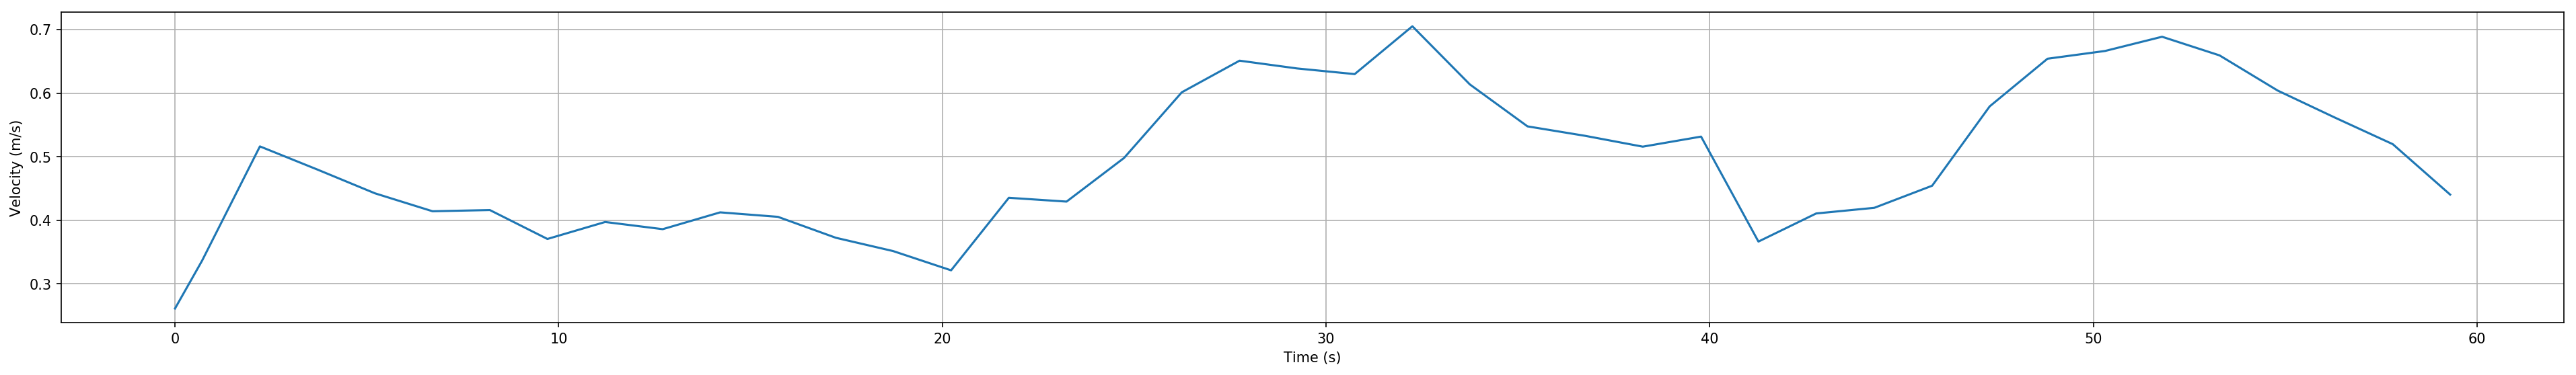

In [17]:
plt.figure(dpi=150, figsize=(32,4))
plt.grid()
# plt.xlim(39,102)
# plt.ylim(0,0.9)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
# plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
# plt.plot(t_wp, waypoints_df.V_avg)
plt.plot(t_wp, v)

#### This is to check when is the car going to move 

In [44]:
# df.index[(df['t'] >= 39.0) & (df['t']<=40.0)]
# for i in range(390,400):
#     print(df.iloc[i])

In [18]:
waypoints_df.head()

,X,Y,V,T
0,0.245929,0.029811,0.260967,0.000000
1,0.462300,0.050849,0.336277,0.705567
2,1.115563,0.121319,0.516169,2.213089
3,1.839641,0.226404,0.479728,3.711154
4,2.498112,0.370623,0.442283,5.212942


In [46]:
# waypoints_df.V = waypoints_df.V.mean()* 1.5
# waypoints_df.head()

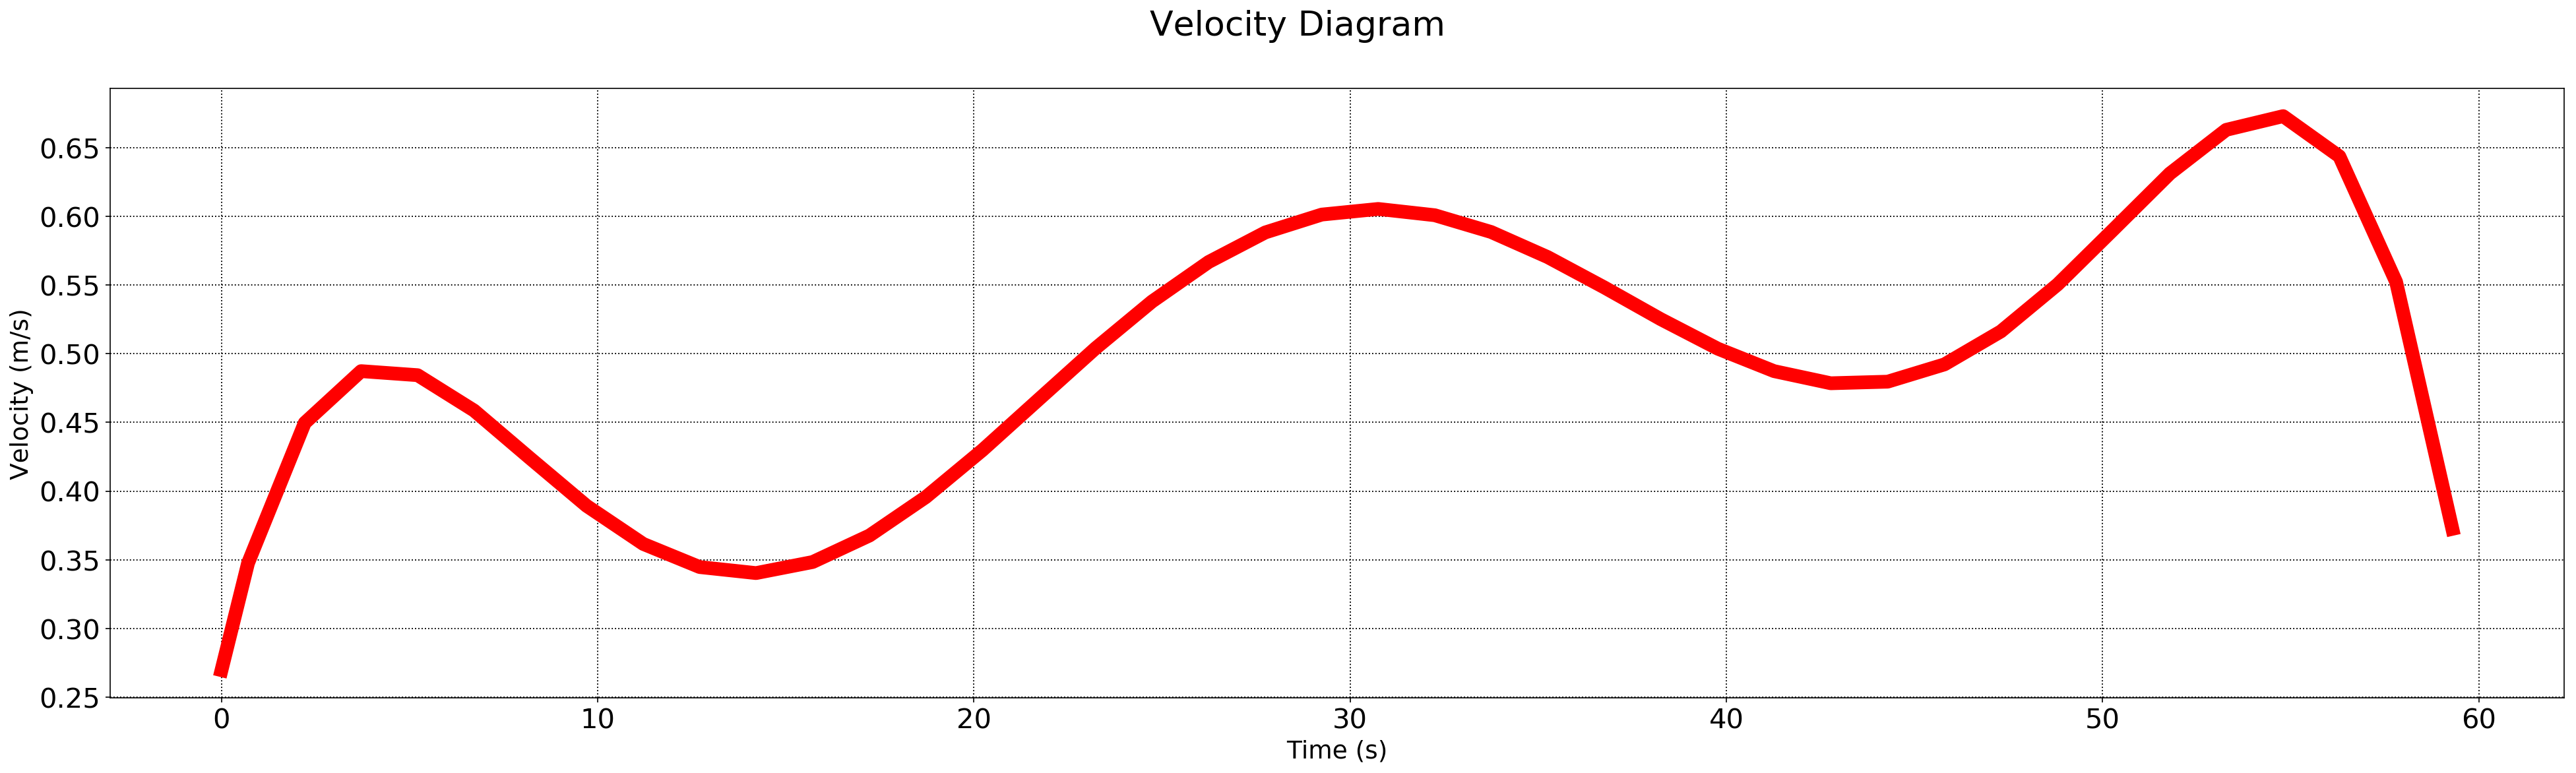

In [19]:
polyV = waypoints_df['V'].to_numpy()
polyT = waypoints_df['T'].to_numpy()
# print(polyT.shape)
V_polyfit = []
V_fcn = np.poly1d(np.polyfit(polyT , polyV,6))
for i in polyT:
    V_polyfit.append(V_fcn(i))
# print(V_fcn(t_wp[0]))
# print(V_polyfit)

plt.figure(dpi=150, figsize=(32,8))
plt.suptitle('Velocity Diagram', fontsize=25)
plt.grid(color = 'k', linestyle = ':', linewidth = 0.9)
# plt.xlim(0,65)
# plt.ylim(0,0.6)
plt.tick_params(axis='both', labelsize=20)

plt.xlabel('Time (s)',fontsize=18)
plt.ylabel('Velocity (m/s)',fontsize=18)

# plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
# plt.plot(t_wp, waypoints_df.V_avg)
plt.plot(polyT, V_polyfit, color ='r',linewidth=10)

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

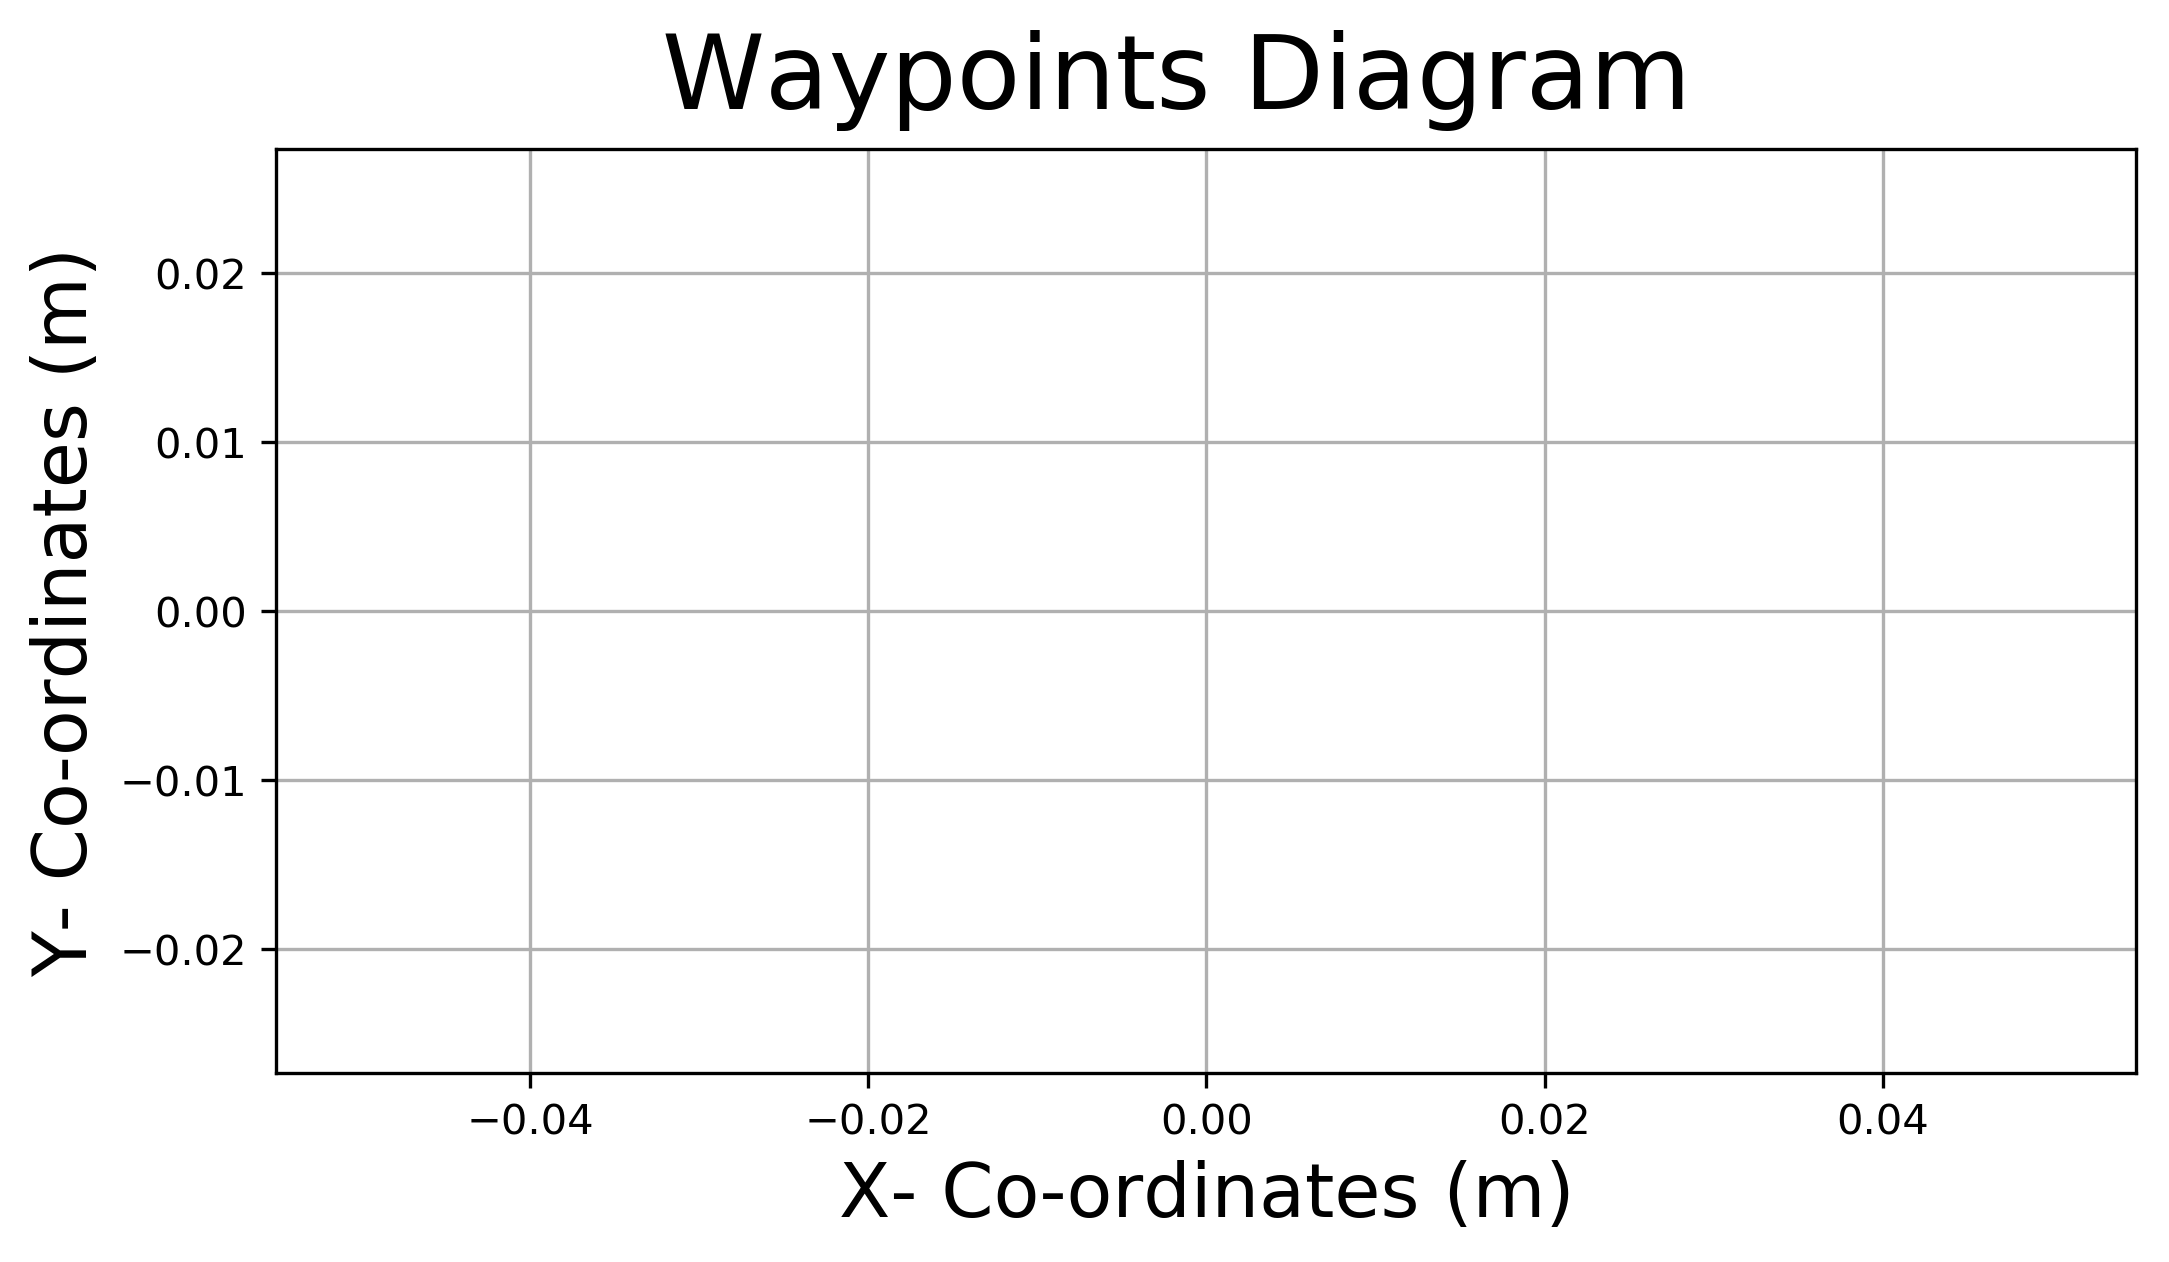

In [20]:
plt.figure(dpi=300, figsize=(8,4))
plt.suptitle('Waypoints Diagram', fontsize=25)
plt.grid()
plt.xlabel('X- Co-ordinates (m)',fontsize=18)
plt.ylabel('Y- Co-ordinates (m)',fontsize=18)
plt.axis('equal')
plt.plot(waypoints_df.X , waypoints_df.Y , color= 'g', linewidth=1)

In [55]:
# t_wp

# polyTrack = waypoints_df.V.to_numpy()
# # print(polyTrack)
# Track_polyfit = []
# Track_fcn = np.poly1d(np.polyfit(t_wp , polyTrack,6))
# for i in t_wp:
#     V_polyfit.append(V_fcn(i))
# # print(V_fcn(t_wp[0]))
# # print(V_polyfit)

# plt.figure(dpi=150, figsize=(32,8))
# plt.suptitle('Velocity Diagram', fontsize=25)
# plt.grid(color = 'k', linestyle = ':', linewidth = 0.9)
# # plt.xlim(0,65)
# # plt.ylim(0,0.6)
# plt.tick_params(axis='both', labelsize=20)

# plt.xlabel('Time (s)',fontsize=18)
# plt.ylabel('Velocity (m/s)',fontsize=18)

# # plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
# # plt.plot(t_wp, waypoints_df.V_avg)
# plt.plot(t_wp, V_polyfit, color ='r',linewidth=10)

In [56]:
# waypoints_df.shape

In [144]:
# waypoints_df.V =  V_polyfit
# waypoints_df.V *= 1.0
# finaldf = pd.DataFrame([waypoints_df.X ,waypoints_df.Y , waypoints_df.V]).transpose()
# finaldf.to_csv("racetrack_waypoints.txt", header=False,index=False)
# finaldf.head()

In [21]:
waypoints_df.V =  V_polyfit
waypoints_df.V -= waypoints_df.V[0]
finaldf = pd.DataFrame([waypoints_df.X, waypoints_df.Y, waypoints_df.V]).transpose()
finaldf.to_csv("mpc_out.csv", header=False, index=False)
print(finaldf.shape)
finaldf.head()

(41, 3)


,X,Y,V
0,0.245929,0.029811,0.000000
1,0.462300,0.050849,0.077905
2,1.115563,0.121319,0.180022
3,1.839641,0.226404,0.217728
4,2.498112,0.370623,0.214782


In [58]:
# polyV = carla_df['V'].to_numpy()
# polyT = carla_df['Tway'].to_numpy()
# # print(polyT.shape)
# V_polyfit = []
# V_fcn = np.poly1d(np.polyfit(polyT , polyV,6))
# for i in polyT:
#     V_polyfit.append(V_fcn(i))
# # print(V_fcn(t_wp[0]))
# # print(V_polyfit)

# plt.figure(dpi=150, figsize=(32,8))
# plt.suptitle('Velocity Diagram', fontsize=25)
# plt.grid(color = 'k', linestyle = ':', linewidth = 0.9)
# # plt.xlim(0,65)
# # plt.ylim(0,0.6)
# plt.tick_params(axis='both', labelsize=20)

# plt.xlabel('Time (s)',fontsize=18)
# plt.ylabel('Velocity (m/s)',fontsize=18)

# # plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
# plt.plot(polyT, V_polyfit, color ='r',linewidth=10)

In [59]:
# carla_df.V =  V_polyfit
# carla_df.V -= carla_df.V[0]
# finaldf = pd.DataFrame([carla_df.X, carla_df.Y, carla_df.V]).transpose()
# finaldf.to_csv("w_test.csv", header=False, index=False)
# print(finaldf.shape)
# finaldf.head()

$E_{x} = (E_{x1} + E_{x2} \cdot df_{z} + E_{x3} \cdot df_{z}^{2}) \cdot (1 – E_{x4} \cdot \text{sgn}(k_{x}))$



$df_{z} = \frac{F_{z}-F_{z0}}{F_{z0}}$

$mu_{x} = D_{x1} + D_{x2} \cdot df_{z}$

$F_{z} = F_{z} \cdot D \cdot \sin \left ( C \cdot \arctan \left \{ B \cdot k – E \cdot \left [ B \cdot k – \arctan(B \cdot k) \right ] \right \} \right )$
